In [44]:
import torch
import torch.nn.functional as F
from overfit.utils.misc import sharpen
import matplotlib.pyplot as plt

In [2]:
torch.set_printoptions(precision=5, sci_mode=False)

In [3]:
x = torch.rand(4)

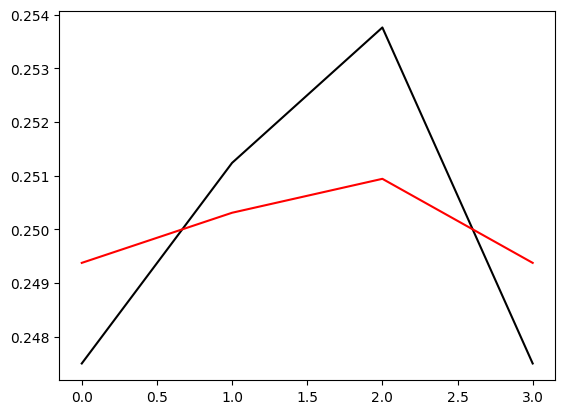

In [7]:
x = torch.Tensor([0.24, 0.255, 0.265, 0.24])
y = F.softmax(x, dim=0)
ysoft = F.softmax(y, dim=0)
fig, ax = plt.subplots(1, 1)
ax.plot(y, c='black')
ax.plot(ysoft, c='red')

In [47]:
T = 0.2
a = sharpen(F.softmax(x, dim=0), T, dim=0)
b = F.softmax(x / T, dim=0)

In [48]:
print(x)
print(x / T)
print(a)
print(b)

tensor([0.49484, 0.74037, 0.90960, 0.31097])
tensor([2.47421, 3.70185, 4.54799, 1.55484])
tensor([0.07833, 0.26735, 0.62309, 0.03124])
tensor([0.07833, 0.26735, 0.62309, 0.03124])


In [52]:
for T in [-0.1, 0.1, 0.2, 0.3, 0.4, 0.9, 1, 1.1]:
    a = sharpen(F.softmax(x, dim=0), T, dim=0)
    b = F.softmax(x / T, dim=0)
    assert torch.allclose(a, b), (a, b)

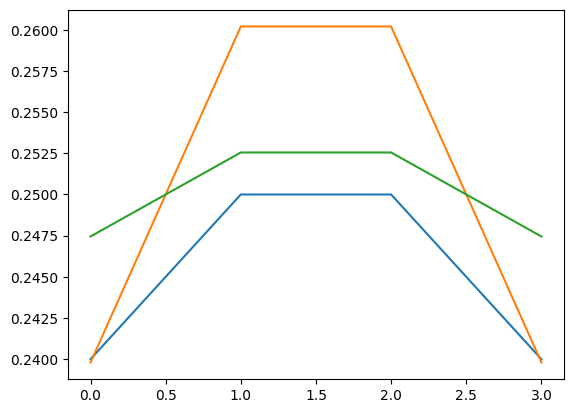

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(x)
ax.plot(y)
ax.plot(a)

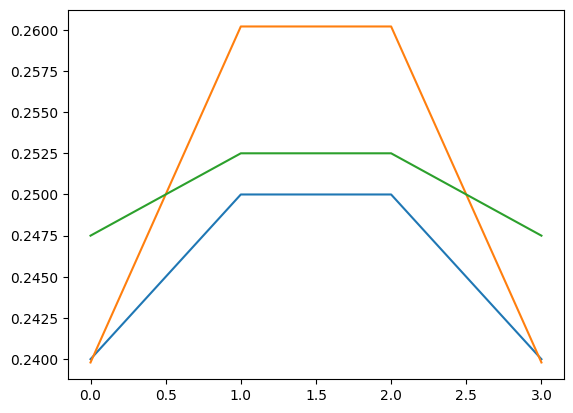

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(x)
ax.plot(y)
ax.plot(b)

In [9]:
print(b)

tensor([0.4445, 0.2596, 0.1526, 0.1432])


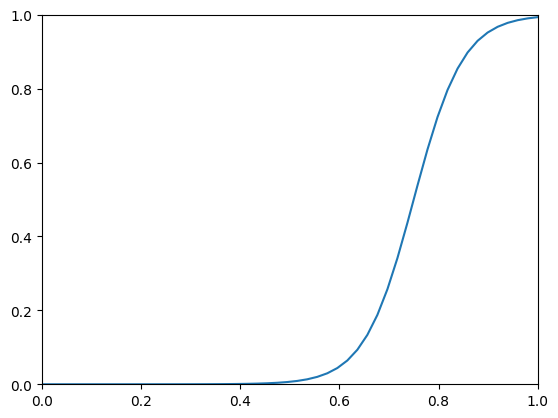

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-1, 1, 100)
z = 1/(1 + np.exp(-x*20 + 15))
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot(x, z)
  
plt.show()

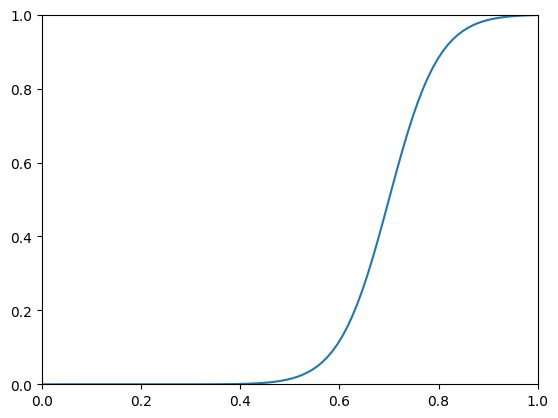

In [43]:
x = np.linspace(0, 1, 100)
b = 5
def sigmoid(x,b):
    return np.power(x, b)/(np.power(x, b) + np.power(1 -x, b))
z = sigmoid(x - 0.2, 5)
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.plot(x, z)
  
plt.show()

In [72]:
x = torch.rand(20)
x = F.softmax(x / 0.05, dim=0)

In [74]:
x = torch.Tensor([0.0] * 10 + [100.0] + [0.0] * 9)



In [80]:
@torch.jit.script
def softmax_entropy(x: torch.Tensor, dim: int) -> torch.Tensor:
    """Entropy of softmax distribution from logits."""
    return -(x.softmax(dim=dim) * x.log_softmax(dim=dim)).sum(dim=dim)
@torch.jit.script
def pseudo_cross_entropy(x: torch.Tensor, T: int, dim: int) -> torch.Tensor:
    """Entropy of softmax distribution from logits."""
    return -((x / T).softmax(dim=dim) * x.log_softmax(dim=dim)).sum(1)

@torch.jit.script
def cross_entropy(x: torch.Tensor, y: torch.Tensor, dim: int) -> torch.Tensor:
    """Entropy of softmax distribution from logits."""
    return -(y * x.log_softmax(dim=dim)).sum(dim=dim)

-100.0
tensor(-0.)
-100.0
tensor(-0.)
-100.0
tensor(-0.)
-100.0
tensor(-0.)
-100.0
tensor(-0.)


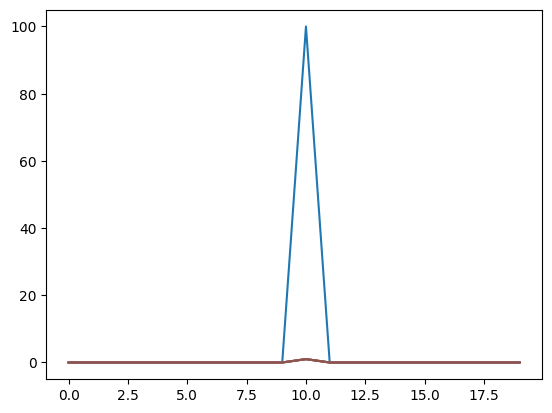

In [76]:
# x = torch.Tensor([1, 2, 1.2, 1.1])

fig, ax = plt.subplots(1, 1)
ax.plot(x)

for T in [0.5, 0.2, 0.1, 0.05, 0.01]:
    xs = F.softmax(x / T, dim=0)
    ax.plot(xs)
    eps = np.finfo(float).eps
    losses = [
        F.cross_entropy(x, xs),
        softmax_entropy(x),
        

    ]
    print(loss2)
    print(loss)